IMPORTING LIBRARIES AND MODELS

In [2]:
#import all models for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


LOADING THE DATASET 

In [3]:
#load the dataset
comm_data = pd.read_csv('Data.csv')

UNDERSTANDING THE DATASET

In [15]:
comm_data.shape

(400000, 19)

In [16]:
comm_data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [18]:
comm_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,9,7,17000.000000,32.000000,18000.0,6000.0,34.0,3369.763441,97.0,355.0,6.000000,7.874282,7.187003,0,58,15,35.000000,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,14,7,4300.000000,29.000000,4427.0,1476.0,37.0,1764.000000,8.0,3.0,0.000000,7.874282,2.000000,0,34,25,22.000000,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,11,7,1500.000000,3.000000,1500.0,500.0,3.0,3369.763441,30.0,30.0,23.134608,7.874282,7.187003,0,25,15,3.000000,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,2,7,1500.000000,3.000000,2497.0,832.0,4.0,0.000000,159.0,45.0,19.000000,7.874282,7.187003,0,9,84,3.000000,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,2,7,5522.971346,11.503733,498.0,166.0,3.0,1.000000,1.0,3.0,23.134608,7.874282,7.187003,0,45,108,9.254209,0


In [19]:
comm_data.describe()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.0,400000.000000,400000.000000,400000.000000,400000.00000
mean,8.285663,6.858200,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,0.0,30.903250,71.595538,9.254209,0.18711
std,5.894864,0.671401,5720.859508,10.697351,5844.388871,1948.125688,11.956196,8752.618996,696.386587,156.484600,39.960208,10.032222,6.809694,0.0,20.841903,38.155162,9.385172,0.39000
min,0.000000,0.000000,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
25%,1.000000,7.000000,2000.000000,4.000000,1900.000000,633.000000,6.000000,240.000000,12.000000,20.000000,11.000000,7.874282,7.187003,0.0,11.000000,29.000000,4.000000,0.00000
50%,11.000000,7.000000,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,209.000000,95.532927,23.134608,7.874282,7.187003,0.0,32.000000,84.000000,9.254209,0.00000
75%,14.000000,7.000000,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,0.0,52.000000,108.000000,9.254209,0.00000
max,14.000000,7.000000,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,0.0,61.000000,111.000000,629.000000,1.00000


In [20]:

comm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          400000 non-null  int64  
 2   TENURE          400000 non-null  int64  
 3   MONTANT         400000 non-null  float64
 4   FREQUENCE_RECH  400000 non-null  float64
 5   REVENUE         400000 non-null  float64
 6   ARPU_SEGMENT    400000 non-null  float64
 7   FREQUENCE       400000 non-null  float64
 8   DATA_VOLUME     400000 non-null  float64
 9   ON_NET          400000 non-null  float64
 10  ORANGE          400000 non-null  float64
 11  TIGO            400000 non-null  float64
 12  ZONE1           400000 non-null  float64
 13  ZONE2           400000 non-null  float64
 14  MRG             400000 non-null  int64  
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        400000 non-null  int64  
 17  FREQ_TOP_P

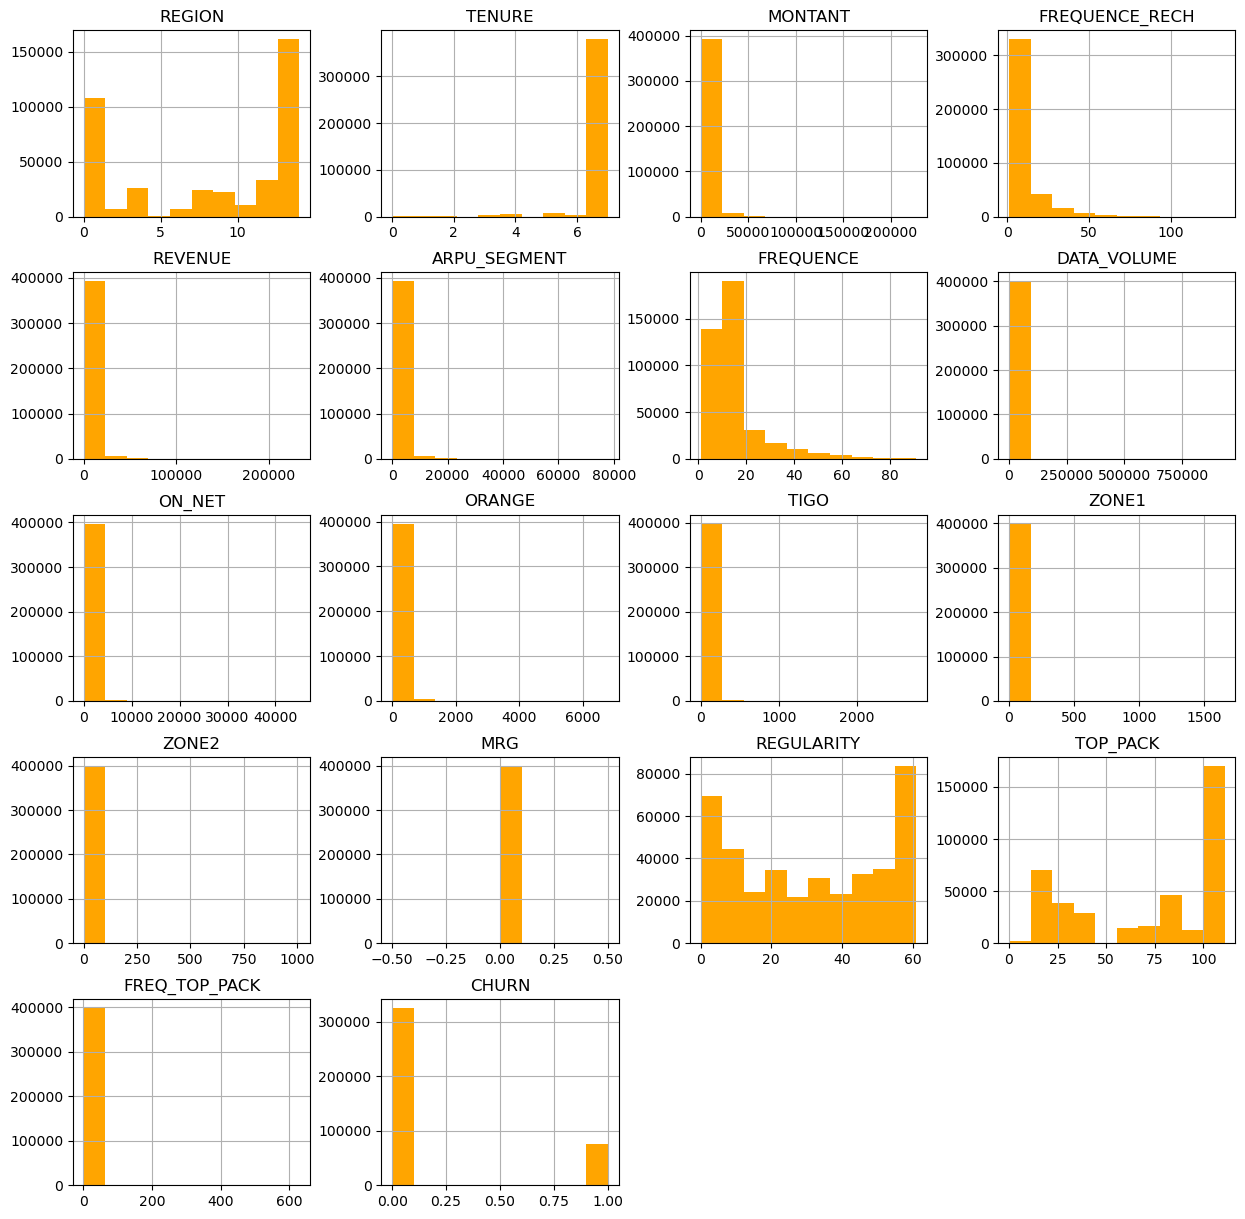

In [22]:
comm_data.hist(figsize=(15, 15), color = 'orange')
plt.show()

DATA CLEANING (PREPROCESSING)

In [5]:
#convert all the columns to small letters 
#comm_data.columns = [col.lower() for col in comm_data.columns]

In [6]:
#check for missing data
comm_data.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [28]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
comm_data[['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']] = imputer.fit_transform(
    comm_data[['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']])

In [30]:
# Encode categorical variables
label_encoders = {}
for column in ['REGION', 'TENURE', 'MRG', 'REGULARITY', 'TOP_PACK']:
    label_encoders[column] = LabelEncoder()
    comm_data[column] = label_encoders[column].fit_transform(comm_data[column].astype(str))


In [32]:
# Splitting the dataset into training and testing sets
X = comm_data.drop(columns=['user_id', 'CHURN', 'ZONE1', 'ZONE2'])
y = comm_data['CHURN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((320000, 15), (80000, 15), (320000,), (80000,))

In [34]:
# Dimensionality reduction with PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

MODEL ANALYSIS

In [35]:
# Training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, y_train)



In [13]:
#prediting on the test set
y_pred = svm_model.predict(X_test_pca)

In [14]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.842425
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     65023
           1       0.57      0.65      0.61     14977

    accuracy                           0.84     80000
   macro avg       0.74      0.77      0.75     80000
weighted avg       0.85      0.84      0.85     80000

